# <font color='#d50283'>IT Academy - Data Science</font>
## Sprint 8 Tarea 1 - Feature Engineering
### Luis Ortas



In [1]:

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re

***
## Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.

In [2]:
df=pd.read_csv('athlete_events.csv',dtype={'Age':'Int64'},index_col=False)

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Medalla en el atributo 'Medal' sustituimos NaN por 'No Medal'

def medalla(x):
    if pd.isna(x):
        x='No Medal'
    else:
        x=x
    return x

df['Medal']=df['Medal'].apply(lambda x: medalla(x))

In [4]:
df.Medal.value_counts()

No Medal    231333
Gold         13372
Bronze       13295
Silver       13116
Name: Medal, dtype: int64

In [5]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
def resumen(df):
    '''resumen describe() de todos
    los atributos'''
    
    #View summary statistics of each variable.
    for v in df.columns:
            print ("\n" + v+": ""\n")
            print(df[v].describe())
            print()
            print('--------')
         
          
resumen(df)


ID: 

count    271116.000000
mean      68248.954396
std       39022.286345
min           1.000000
25%       34643.000000
50%       68205.000000
75%      102097.250000
max      135571.000000
Name: ID, dtype: float64

--------

Name: 

count                   271116
unique                  134732
top       Robert Tait McKenzie
freq                        58
Name: Name, dtype: object

--------

Sex: 

count     271116
unique         2
top            M
freq      196594
Name: Sex, dtype: object

--------

Age: 

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

--------

Height: 

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

--------

Weight: 

count    208241.00000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  Int64  
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: Int64(1), float64(2), int64(2), object(10)
memory usage: 31.3+ MB


In [8]:
df.isnull().sum()

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

#### Plantearemos la hipotesis que utilizamos Age, Height y Weigh. El atributo objetivo es Medal.


In [9]:
sum(df.duplicated())

1385

In [10]:
# remplazamos valor nulos por mediana

df.Age.fillna(df.Age.median(),inplace=True)
df.Height.fillna(df.Height.median(),inplace=True)
df.Weight.fillna(df.Weight.median(),inplace=True)
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

#### Dummy

In [11]:
# Variables dummy por atributos categoricos. 'Medal'
dummy1 = pd.get_dummies(df['Sex'])
dummy1.sample(5)

,F,M
129779,0,1
257786,0,1
34918,1,0
244227,0,1
58629,1,0


In [12]:
# Variables dummy por atributos categoricos. 'Sport'
dummy2 = pd.get_dummies(df['Sport'])
dummy2.sample(5)

,Aeronautics,Alpine Skiing,Alpinism,Archery,Art Competitions,Athletics,Badminton,Baseball,Basketball,Basque Pelota,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
71436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
222914,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df2=df.drop(['Sex','Sport'], axis=1)

In [14]:
df3 = df2.merge(dummy1, left_index=True, right_index=True)
df4 = df3.merge(dummy2, left_index=True, right_index=True)
df4.sample(5)

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
134417,67671,Florence Lebrun,37,160.0,53.0,France,FRA,1996 Summer,1996,Summer,...,0,0,0,0,0,0,0,0,0,0
248238,124277,Robert Van de Walle,34,187.0,95.0,Belgium,BEL,1988 Summer,1988,Summer,...,0,0,0,0,0,0,0,0,0,0
101529,51342,Hunh Chu,27,165.0,54.0,Vietnam,VIE,1988 Summer,1988,Summer,...,0,0,0,0,0,0,0,0,0,0
161058,80821,Sherif Hegazy Moemen,30,185.0,82.0,Egypt,EGY,2004 Summer,2004,Summer,...,0,0,0,0,0,0,0,0,0,0
46115,23805,Heleen Crielaard,25,180.0,74.0,Netherlands,NED,1992 Summer,1992,Summer,...,0,0,0,0,0,0,1,0,0,0


#### StandardScaler

In [15]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
#Iniziamos
ss = StandardScaler()
#scalamos
Xstd = ss.fit_transform(df[['Age','Height','Weight']].values)
print(Xstd.mean(), Xstd.std())

-8.85133915460705e-17 1.0


In [16]:
df_std=pd.DataFrame(data=Xstd,columns=['Age','Height','Weight'])
df_std

,Age,Height,Weight
0,-0.238971,0.510420,0.752137
1,-0.398020,-0.567265,-0.837921
2,-0.238971,-0.028423,-0.042892
3,1.351524,-0.028423,-0.042892
4,-0.716119,1.049262,0.911143
...,...,...,...
271111,0.556277,0.402651,1.467663
271112,0.238178,0.079346,-0.917423
271113,0.238178,0.079346,-0.917423
271114,0.715326,1.049262,2.024183


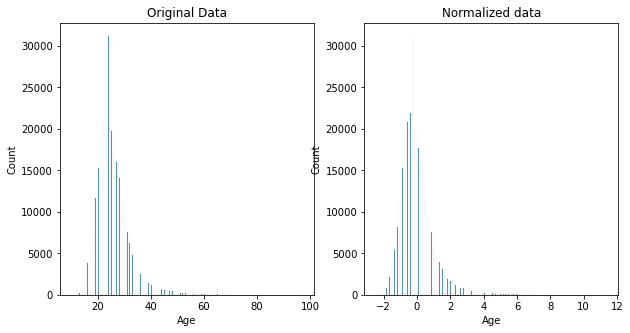

In [17]:
# COMPARAMOS LOS HISTOGRAMAS.
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

sns.histplot(df.Age, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(df_std.Age, ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()

***
## Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

In [18]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
caracteristicas=['Age','Height','Weight']
x=df.loc[:,caracteristicas]

y = df.loc[:,['Medal']].values # NO LO TRABJAREMOS

x = StandardScaler().fit_transform(x)### estandarificapmps

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalesComponentes = pca.fit_transform(x)
principalDf = pd.DataFrame(data =principalesComponentes
             , columns = ['Componente Principal 1', 'Componente Principal 2'])


principalDf

,Componente Principal 1,Componente Principal 2
0,0.819222,-0.420686
1,-1.057796,-0.178749
2,-0.101798,-0.222239
3,0.247977,1.327330
4,1.194270,-1.007350
...,...,...
271111,1.416336,0.288388
271112,-0.529351,0.327506
271113,-0.529351,0.327506
271114,2.280888,0.253117


#### Hemos reducido de tres componentes a 2

In [20]:
finalDf = pd.concat([principalDf, df[['Medal']]], axis = 1)
finalDf

,Componente Principal 1,Componente Principal 2,Medal
0,0.819222,-0.420686,No Medal
1,-1.057796,-0.178749,No Medal
2,-0.101798,-0.222239,No Medal
3,0.247977,1.327330,Gold
4,1.194270,-1.007350,No Medal
...,...,...,...
271111,1.416336,0.288388,No Medal
271112,-0.529351,0.327506,No Medal
271113,-0.529351,0.327506,No Medal
271114,2.280888,0.253117,No Medal


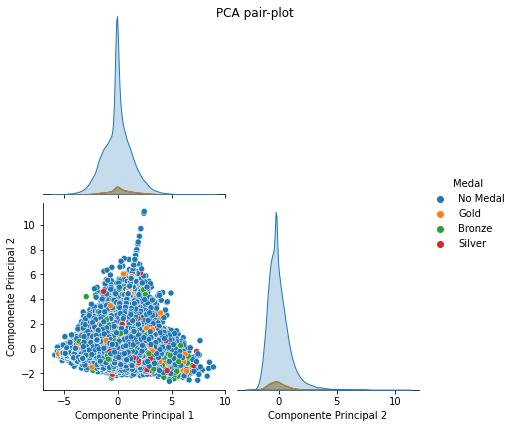

In [21]:
# PCA pair-plot
foo = sns.pairplot(finalDf, hue='Medal', corner=True, height=3)
foo.fig.suptitle('PCA pair-plot');

In [22]:
pca.explained_variance_ratio_

array([0.60958252, 0.31993323])

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalesComponentes = pca.fit_transform(x)
principalDf = pd.DataFrame(data =principalesComponentes
             , columns = ['Componente Principal 1', 'Componente Principal 2','Componente Principal 3'])


principalDf

,Componente Principal 1,Componente Principal 2,Componente Principal 3
0,0.819222,-0.420686,0.187732
1,-1.057796,-0.178749,-0.177305
2,-0.101798,-0.222239,0.001287
3,0.247977,1.327330,-0.077250
4,1.194270,-1.007350,-0.054073
...,...,...,...
271111,1.416336,0.288388,0.732415
271112,-0.529351,0.327506,-0.719178
271113,-0.529351,0.327506,-0.719178
271114,2.280888,0.253117,0.665913


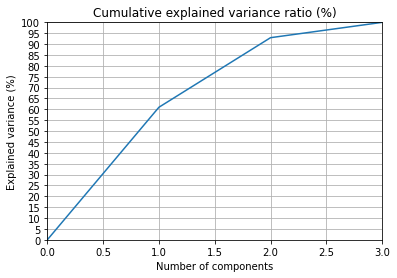

In [24]:
# Cumulative explained variance ratio




x = range(0,4)
y = np.pad(np.cumsum(pca.explained_variance_ratio_), (1,0))*100
plt.grid()
plt.yticks(range(0, 120, 5))

plt.plot(x,y)
plt.xlim(0,3)
plt.ylim(0,100)

plt.xlabel('Number of components');
plt.title('Cumulative explained variance ratio (%)');
plt.ylabel('Explained variance (%)');


#### Dos componentes tiene el aproximadamente el 93% de la varianza

***
### Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

#### Primero investigamo los outliers.

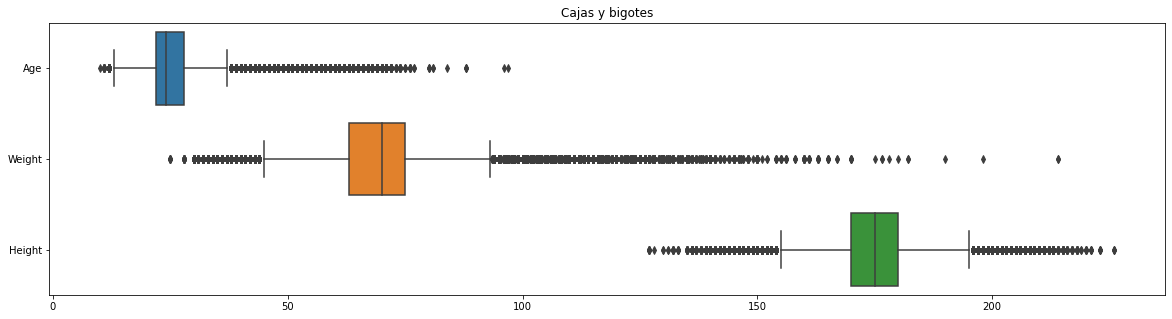

In [25]:
plt.figure(figsize=(20,5))

sns.boxplot(data=df[['Age','Weight','Height']], orient='h');
plt.title('Cajas y bigotes')
plt.show();

In [26]:
#outliers por interquartil*1.5
age=df.Age
weight=df.Weight
heifht=df.Height

#age

sorted(age)
q1, q3= np.percentile(age,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print(f'Límite outlier inferior: {lower_bound}')
print(f'Limite outliersuperior: {upper_bound}')

Límite outlier inferior: 13.0
Limite outliersuperior: 37.0


In [27]:
# listado registros outlier superior Edad
df[df['Age']>upper_bound]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
58,19,Win Valdemar Aaltonen,M,54,175.0,70.0,Finland,FIN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",No Medal
89,28,Jan-Erik Aarberg,M,43,170.0,77.0,Norway,NOR,1968 Summer,1968,Summer,Mexico City,Sailing,Sailing Mixed Three Person Keelboat,No Medal
90,28,Jan-Erik Aarberg,M,47,170.0,77.0,Norway,NOR,1972 Summer,1972,Summer,Munich,Sailing,Sailing Mixed Three Person Keelboat,No Medal
124,45,Hakon Aasns,M,41,175.0,70.0,Norway,NOR,1936 Summer,1936,Summer,Berlin,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",No Medal
126,46,Hans Aasns,M,45,194.0,93.0,Norway,NOR,1948 Summer,1948,Summer,London,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270955,135494,Jacek uawski,M,41,175.0,70.0,Poland,POL,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",No Medal
270970,135501,Ellina Aleksandrovna Zvereva (Kisheyeva-),F,39,183.0,100.0,Belarus,BLR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's Discus Throw,Gold
270971,135501,Ellina Aleksandrovna Zvereva (Kisheyeva-),F,43,183.0,100.0,Belarus,BLR,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Discus Throw,No Medal
270972,135501,Ellina Aleksandrovna Zvereva (Kisheyeva-),F,47,183.0,100.0,Belarus,BLR,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Discus Throw,No Medal


In [28]:
age_Out=df[df['Age']>upper_bound].Age
print(f'Age tiene {len(age_Out)} outliers superiores. El outlier superior menor es {age_Out.min()} y mayor es {age_Out.max()} ')

Age tiene 11928 outliers superiores. El outlier superior menor es 38 y mayor es 97 


#### Normalizaciones

La normalización generalmente se refiere al proceso de "normalizar" una variable para que esté entre 0 y 1. Piense en esto como aplastar la variable para restringirla a un rango específico. Esto también se denomina escalado mínimo-máximo.

In [29]:
from sklearn.preprocessing import MinMaxScaler

X=df[['Age','Height','Weight']]
mms=MinMaxScaler()
Xn=mms.fit_transform(X)
df_norm=pd.DataFrame(data=Xn,columns=['Age_norm','Height_norm','Weight_norm'])
df_norm

,Age_norm,Height_norm,Weight_norm
0,0.160920,0.535354,0.291005
1,0.149425,0.434343,0.185185
2,0.160920,0.484848,0.238095
3,0.275862,0.484848,0.238095
4,0.126437,0.585859,0.301587
...,...,...,...
271111,0.218391,0.525253,0.338624
271112,0.195402,0.494949,0.179894
271113,0.195402,0.494949,0.179894
271114,0.229885,0.585859,0.375661


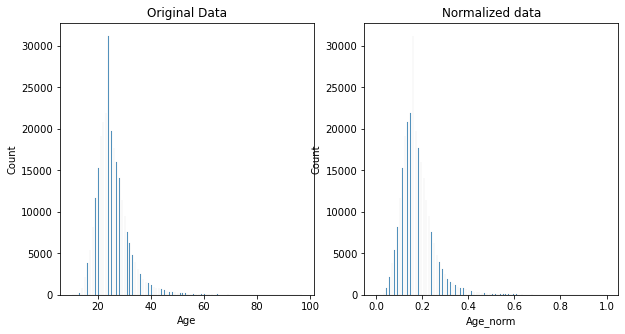

In [30]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

sns.histplot(df.Age, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(df_norm.Age_norm, ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()

In [31]:
#normalization of group of columns. PREPROCESING
from sklearn import preprocessing
X=df[['Age','Height','Weight']]
names=X.columns

X = preprocessing.normalize(X, axis=0)
scaled_df = pd.DataFrame(X, columns=names)
scaled_df.head()

,Age,Height,Weight
0,0.001755,0.001970,0.002144
1,0.001682,0.001860,0.001608
2,0.001755,0.001915,0.001876
3,0.002486,0.001915,0.001876
4,0.001535,0.002024,0.002198


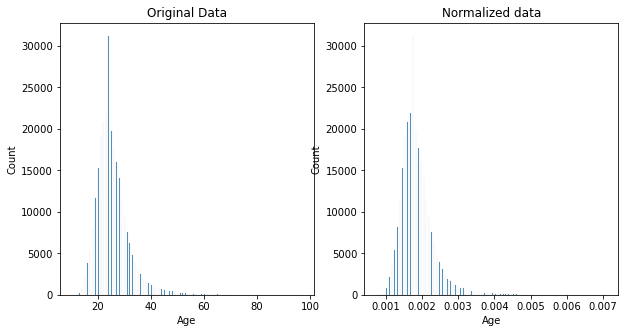

In [32]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

sns.histplot(df.Age, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(scaled_df.Age, ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()

In [33]:
import session_info
session_info.show()

***